# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [162]:
"""
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()
"""

'\n%matplotlib inline\n\nfrom IPython.core.pylabtools import figsize\n\n\nfigsize(12, 8)\n\nsns.set()\n'

In [4]:
athletes = pd.read_csv("athletes.csv")

In [12]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [10]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [8]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [18]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [25]:
athletes['bronze'].value_counts()

0    10845
1      682
2       11
Name: bronze, dtype: int64

In [27]:
athletes['silver'].value_counts()

0    10904
1      613
2       21
Name: silver, dtype: int64

In [28]:
athletes['gold'].value_counts()

0    10919
1      584
2       27
3        5
4        2
5        1
Name: gold, dtype: int64

In [22]:
height = get_sample(athletes, 'height', 100, 42)
print(height)

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
4204     1.75
8647     1.87
127      1.85
2528     1.87
10094    1.77
Name: height, Length: 100, dtype: float64


In [23]:
weight = get_sample(athletes, 'weight', 100, 42)
print(weight)

2162      80.0
3450      70.0
6886      69.0
3871      66.0
6383      82.0
         ...  
5483      95.0
9943      60.0
347       76.0
2783      89.0
10573    100.0
Name: weight, Length: 100, dtype: float64


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [171]:
#O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade.
#Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal.
#A hipótese nula (H0) é a normalidade dos dados.
#Se P-Value < significância (alpha), então temos evidências de que os dados não vêm de uma distribuição normal.
#Se P-Value > significância (alpha), então não podemos afimar que os dados não vêm de uma distribuição normal.

height = get_sample(athletes, 'height', 3000, 42)
meaningfulness = 0.05
print(sct.shapiro(height))

def q1():
    # Retorne aqui o resultado da questão 1.
    return ((sct.shapiro(height))[1] > meaningfulness)

q1()

(0.9961519837379456, 5.681722541339695e-07)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

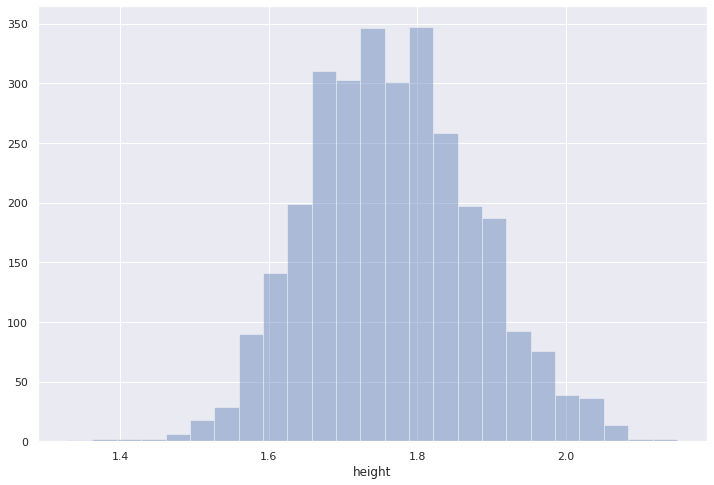

In [61]:
sns.distplot(a=height, bins=25, hist=True, kde=False)
#plt.show()

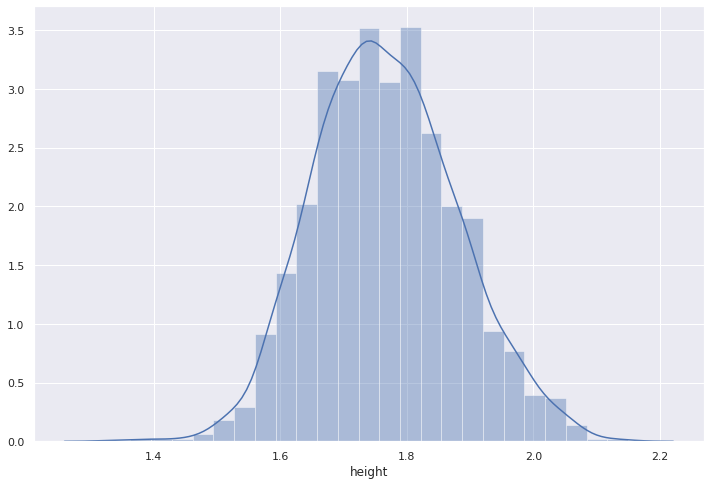

In [50]:
sns.distplot(height, bins=25)
#plt.show()

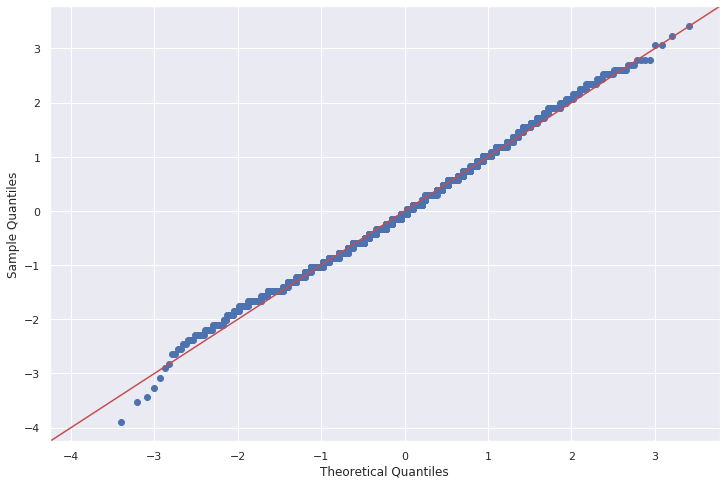

In [53]:
#O q-q plot é uma boa forma gráfica de sabermos se as duas distribuições são iguais ou parecidas.
sm.qqplot(height, fit=True, line='45')
#plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [170]:
#A diferença entre o teste de normalidade de Jarque-Bera e o de Shapiro-Wilk é a estatística de teste utilizada.

print(sct.jarque_bera(height))

def q2():
    # Retorne aqui o resultado da questão 2.
    return bool((sct.jarque_bera(height))[1] > meaningfulness)

q2()

(13.03363513594265, 0.001478366424594868)


False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [169]:
weight = get_sample(athletes, 'weight', 3000, 42)

print(sct.normaltest(weight))

def q3():
    # Retorne aqui o resultado da questão 3.
    return bool((((sct.normaltest(weight))[1]) > meaningfulness))

q3()

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

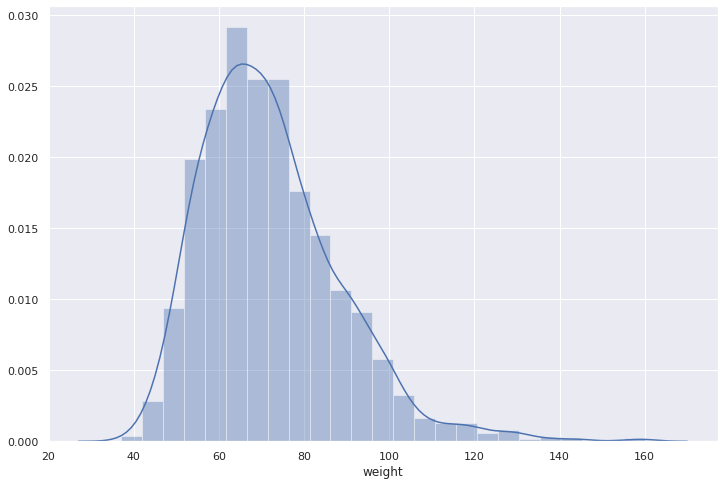

In [63]:
sns.distplot(weight, 25)
#plt.show()

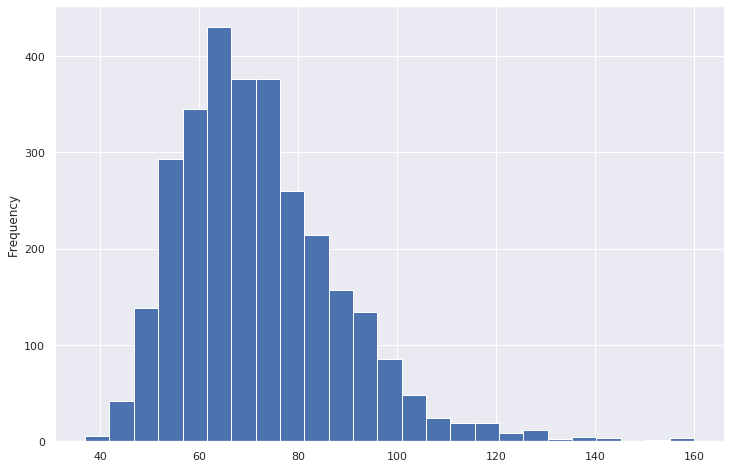

In [58]:
weight.plot(kind='hist', bins=25)
#plt.show()

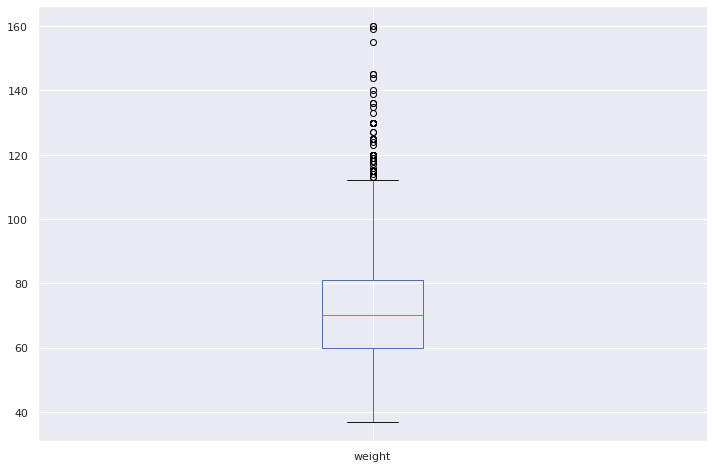

In [65]:
weight.plot(kind='box')
#plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [168]:
print(sct.normaltest(np.log(weight)))

def q4():
    # Retorne aqui o resultado da questão 4.
    return bool((((sct.normaltest(np.log(weight)))[1]) > meaningfulness))

q4()

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

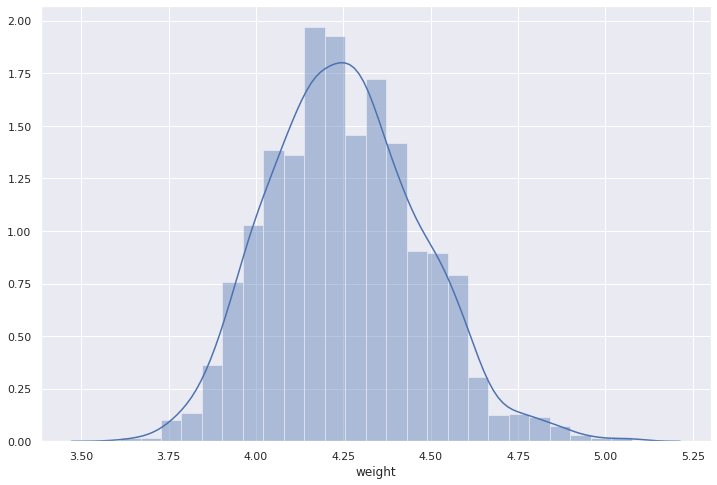

In [68]:
sns.distplot(np.log(weight), bins=25)
#plt.show()

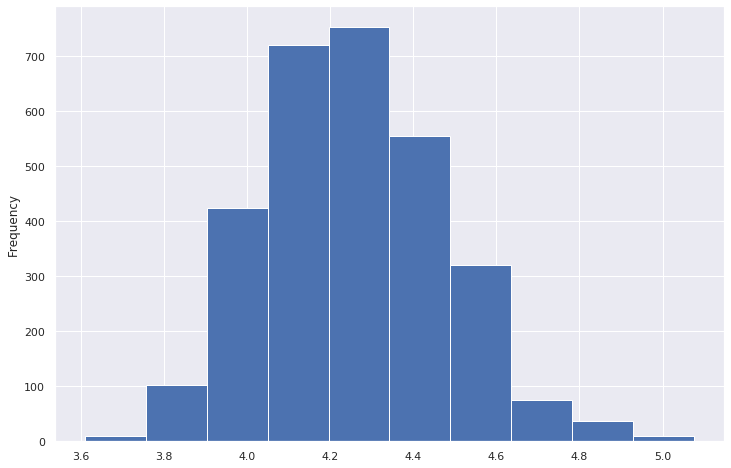

In [69]:
(np.log(weight)).plot(kind='hist')
#plt.show()

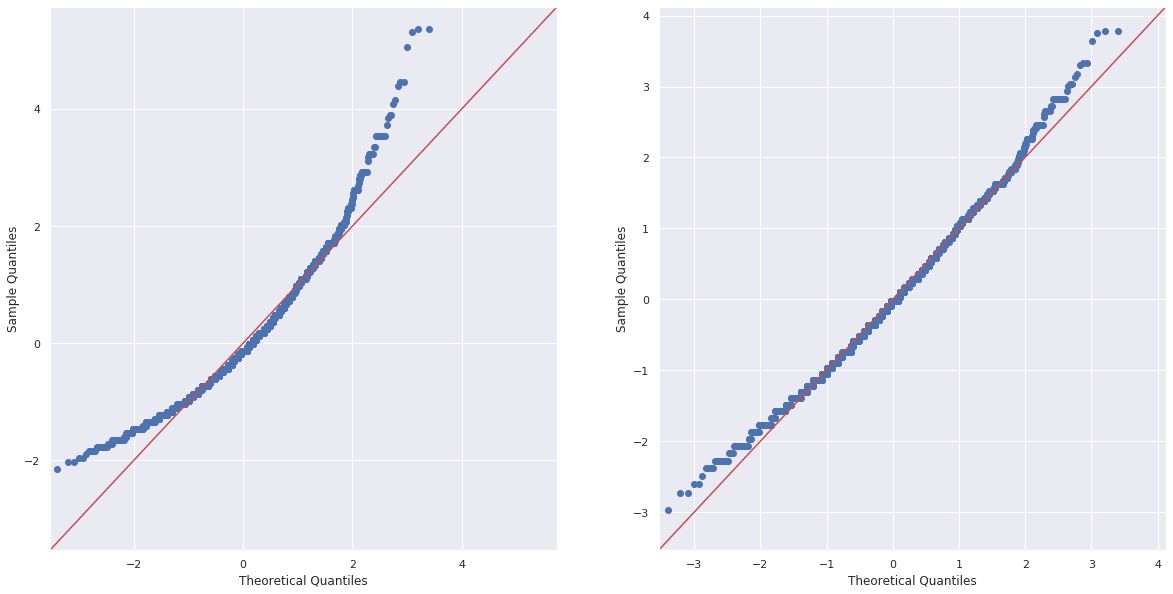

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sm.qqplot(weight, fit=True, line='45', ax=axs[0])
sm.qqplot(np.log(weight), fit=True, line='45', ax=axs[1])
#plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [132]:
bra = athletes[athletes['nationality'] == 'BRA']
bra = bra['height'].dropna()
print(bra.shape)
bra.head()

(476,)


79     1.82
106    1.87
109    1.70
114    1.84
128    1.66
Name: height, dtype: float64

In [133]:
usa = athletes[athletes['nationality'] == 'USA']
usa = usa['height'].dropna()
print(usa.shape)
usa.head()

(560,)


6      2.05
13     1.61
14     1.78
64     1.66
104    1.73
Name: height, dtype: float64

In [136]:
can = athletes[athletes['nationality'] == 'CAN']
can = can['height'].dropna()
print(can.shape)
can.head()

(320,)


2      1.98
77     1.82
92     1.82
238    1.68
332    1.68
Name: height, dtype: float64

In [167]:
#Teste de comparação das médias de duas amostras.
#Descobrirmos se as duas amostras vêm de distribuições de mesma média.

print(sct.ttest_ind(bra, usa))
p_value_pos = 1 

def q5():
    # Retorne aqui o resultado da questão 5.
    return bool((sct.ttest_ind(bra, usa))[p_value_pos] > meaningfulness)

q5()

Ttest_indResult(statistic=-3.2197616412697903, pvalue=0.001322927779592141)


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [165]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool((sct.ttest_ind(bra, can))[p_value_pos] > meaningfulness)

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [164]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float(((sct.ttest_ind(usa, can, equal_var=False))[p_value_pos]).round(8))

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?